# SVM for salary data

In [7]:
!pip install SVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [8]:
train=pd.read_csv('SalaryData_train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
test=pd.read_csv("SalaryData_test(1).csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [10]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [13]:
train.shape

(30161, 14)

In [14]:
test.shape

(15060, 14)

In [16]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [17]:
test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [20]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [21]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


# Data preprocessing

In [22]:
lb=LabelEncoder()

In [24]:
train['workclass']=lb.fit_transform(train['workclass'])
train['education']=lb.fit_transform(train['education'])
train['maritalstatus']=lb.fit_transform(train['maritalstatus'])
train['occupation']=lb.fit_transform(train['occupation'])
train['relationship']=lb.fit_transform(train['relationship'])
train['race']=lb.fit_transform(train['race'])
train['sex']=lb.fit_transform(train['sex'])
train['native']=lb.fit_transform(train['native'])
train['Salary']=lb.fit_transform(train['Salary'])

In [26]:
test['workclass']=lb.fit_transform(test['workclass'])
test['education']=lb.fit_transform(test['education'])
test['maritalstatus']=lb.fit_transform(test['maritalstatus'])
test['occupation']=lb.fit_transform(test['occupation'])
test['relationship']=lb.fit_transform(test['relationship'])
test['race']=lb.fit_transform(test['race'])
test['sex']=lb.fit_transform(test['sex'])
test['native']=lb.fit_transform(test['native'])
test['Salary']=lb.fit_transform(test['Salary'])

# EDA

In [27]:
train=train.iloc[: 2000,:]

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            2000 non-null   int64
 1   workclass      2000 non-null   int64
 2   education      2000 non-null   int32
 3   educationno    2000 non-null   int64
 4   maritalstatus  2000 non-null   int32
 5   occupation     2000 non-null   int32
 6   relationship   2000 non-null   int32
 7   race           2000 non-null   int32
 8   sex            2000 non-null   int32
 9   capitalgain    2000 non-null   int64
 10  capitalloss    2000 non-null   int64
 11  hoursperweek   2000 non-null   int64
 12  native         2000 non-null   int32
 13  Salary         2000 non-null   int32
dtypes: int32(8), int64(6)
memory usage: 156.4 KB


In [29]:
test=test.iloc[: 2400,:]

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            2400 non-null   int64
 1   workclass      2400 non-null   int32
 2   education      2400 non-null   int32
 3   educationno    2400 non-null   int64
 4   maritalstatus  2400 non-null   int32
 5   occupation     2400 non-null   int32
 6   relationship   2400 non-null   int32
 7   race           2400 non-null   int32
 8   sex            2400 non-null   int32
 9   capitalgain    2400 non-null   int64
 10  capitalloss    2400 non-null   int64
 11  hoursperweek   2400 non-null   int64
 12  native         2400 non-null   int32
 13  Salary         2400 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 178.2 KB


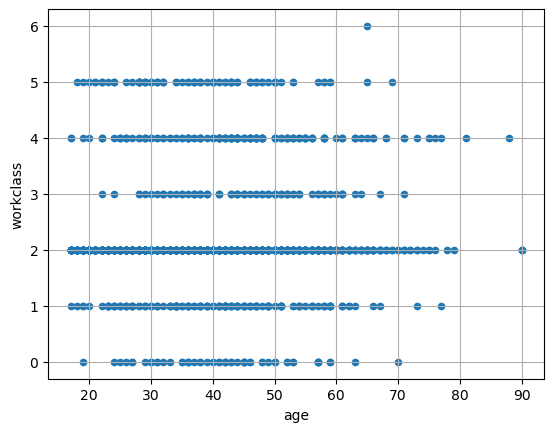

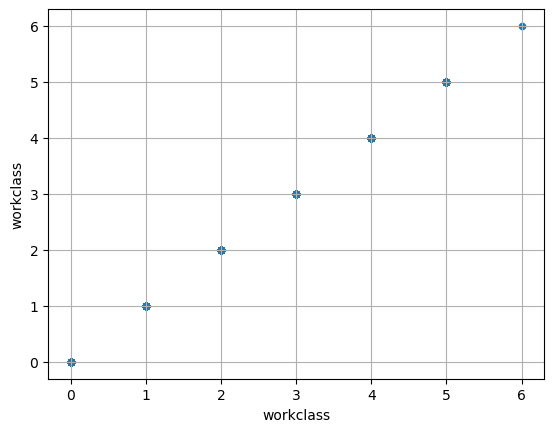

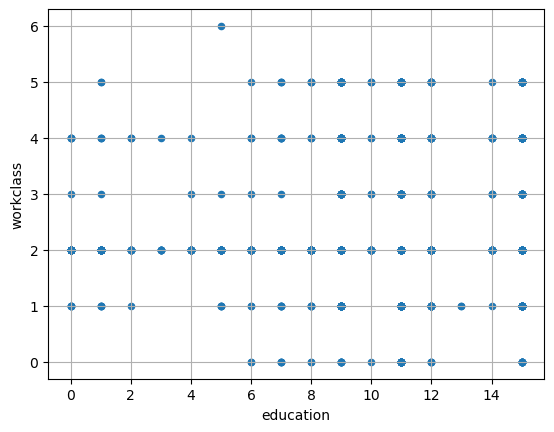

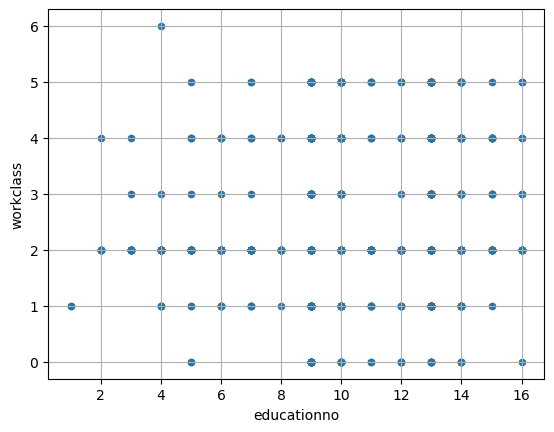

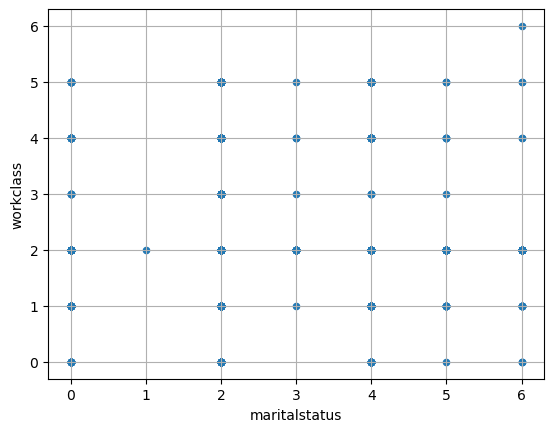

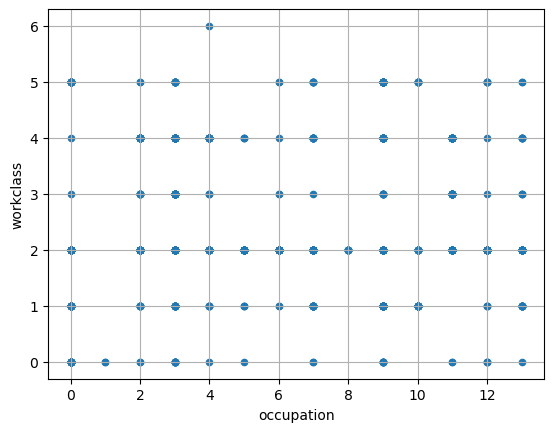

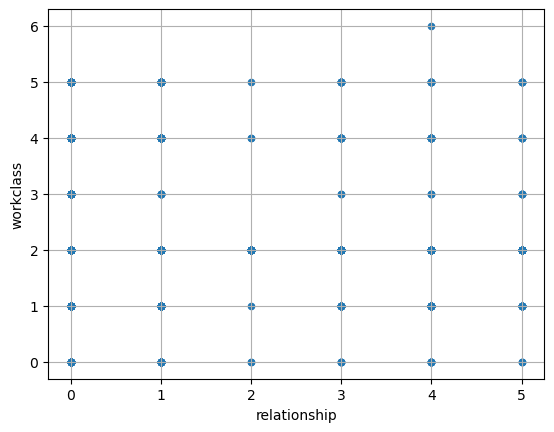

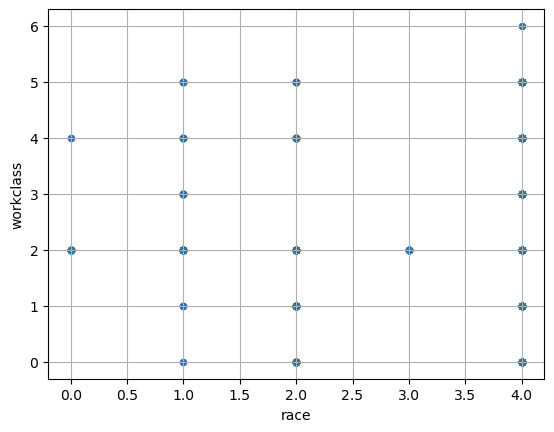

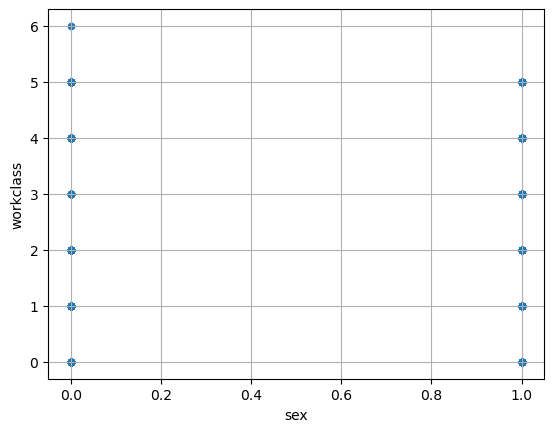

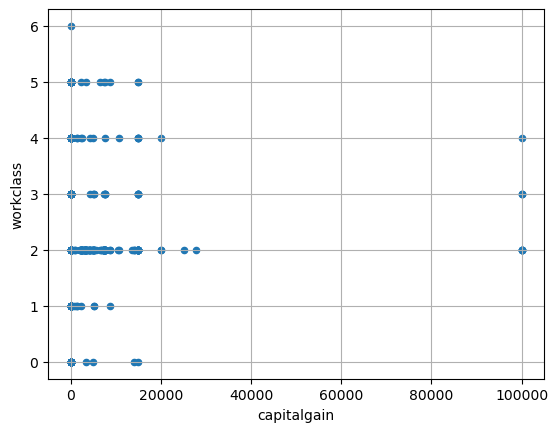

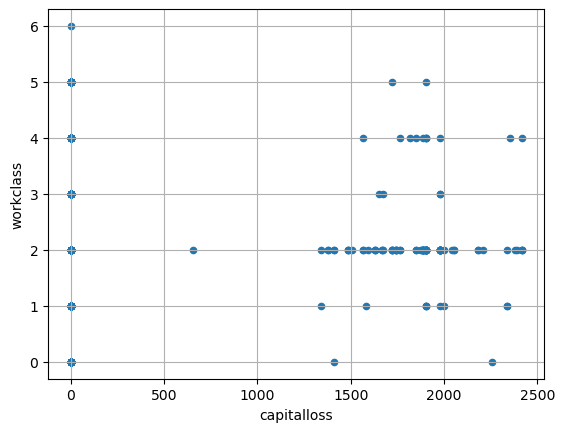

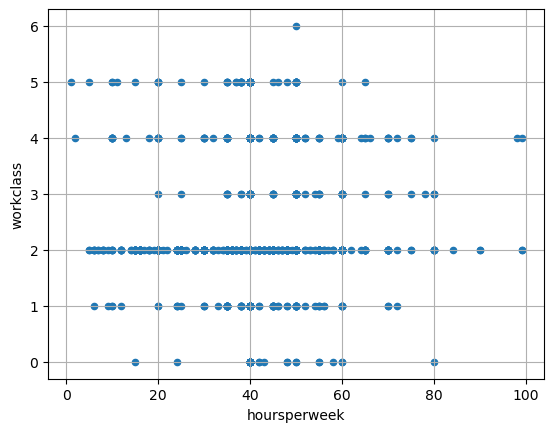

In [31]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'workclass',grid=True)

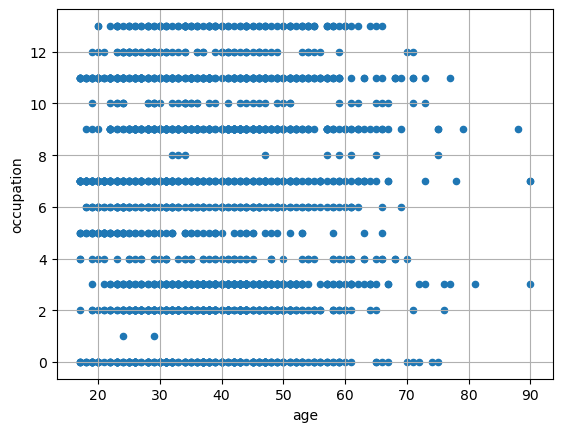

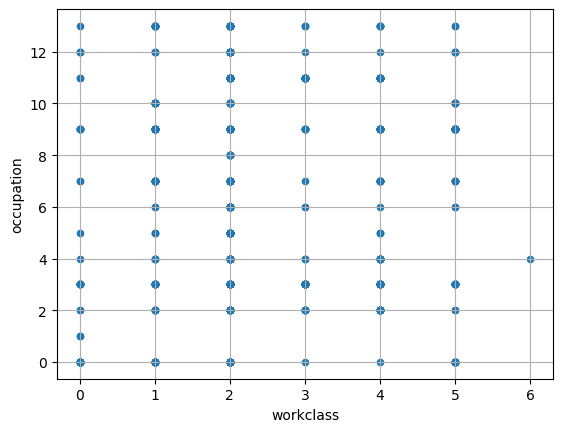

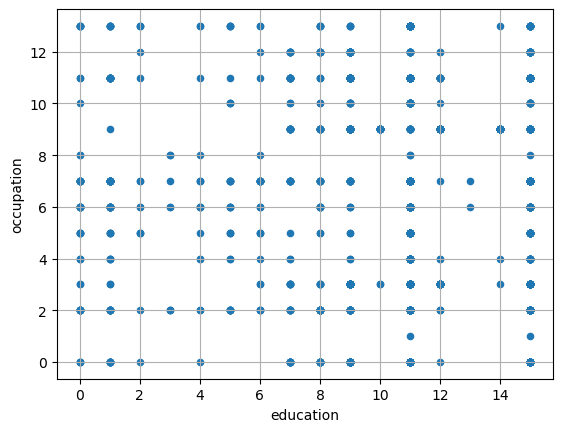

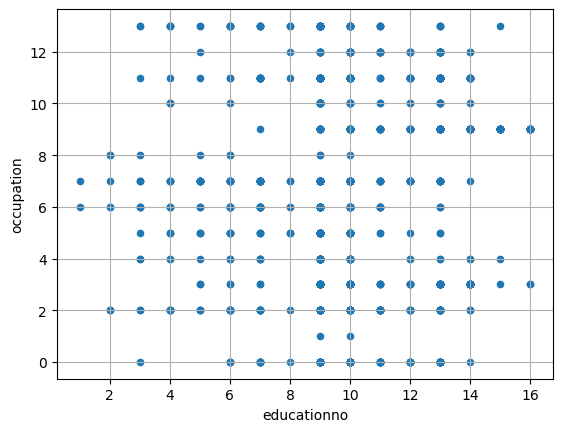

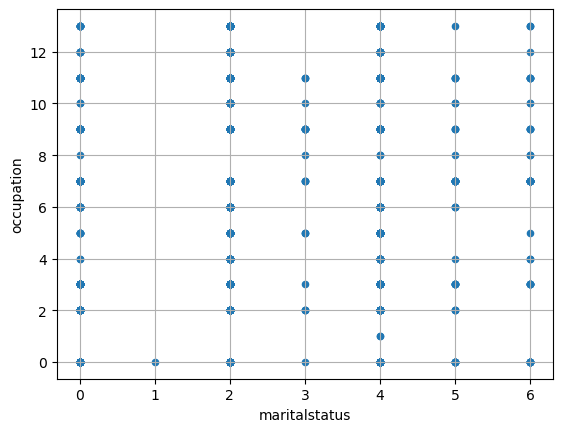

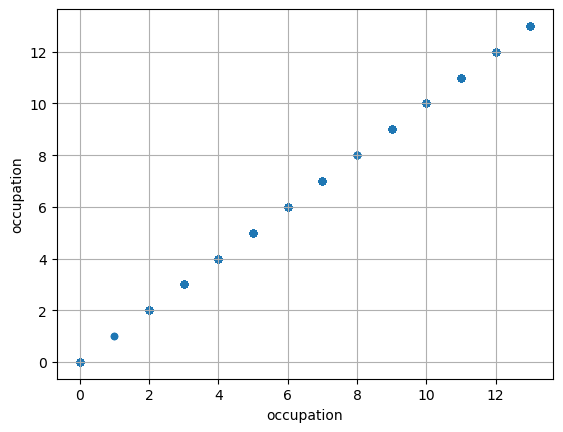

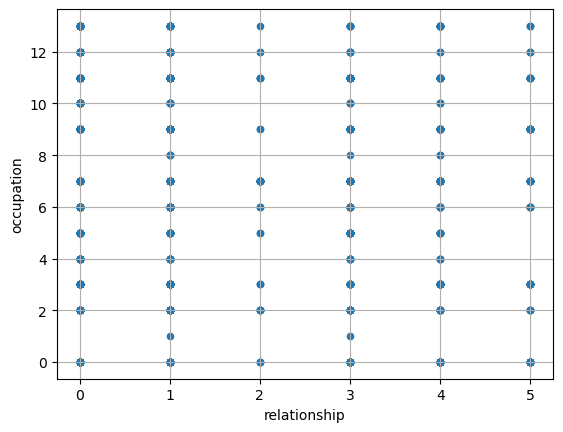

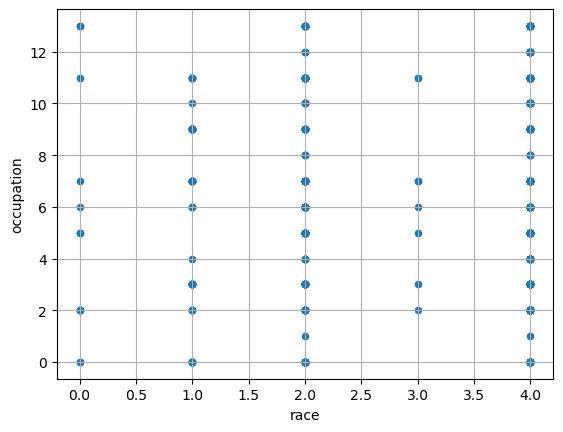

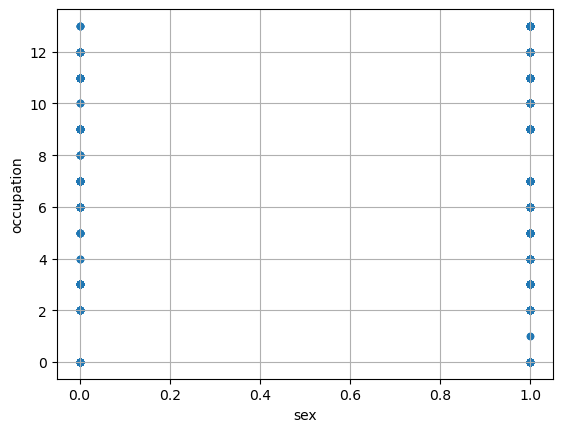

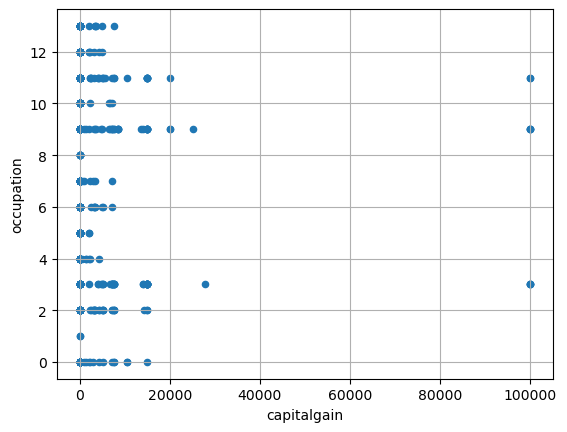

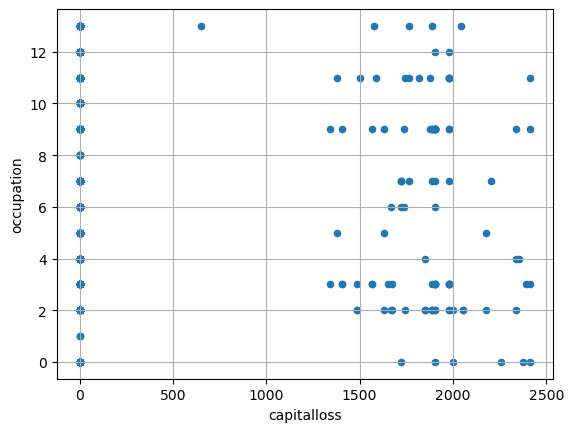

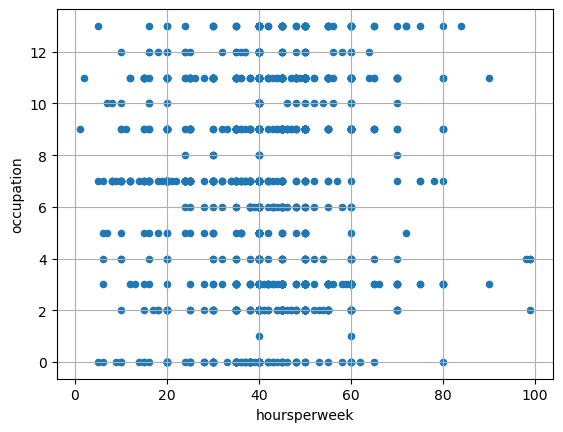

In [32]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'occupation',grid=True)

In [33]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080136,-0.004007,0.014781,-0.249467,-0.004634,-0.216588,0.015168,0.050730,0.081112,0.058997,0.114429,-0.001914,0.231176
workclass,0.080136,1.000000,0.029167,0.068866,-0.043219,0.033209,-0.074186,0.074418,0.087332,0.038314,-0.003069,0.031221,-0.036263,0.064561
education,-0.004007,0.029167,1.000000,0.328746,-0.047668,-0.028564,-0.033833,0.031098,-0.004879,0.035363,0.012082,0.060470,0.085718,0.051282
educationno,0.014781,0.068866,0.328746,1.000000,-0.062303,0.098459,-0.091217,0.075867,0.034123,0.095804,0.062601,0.172302,0.057602,0.308324
maritalstatus,-0.249467,-0.043219,-0.047668,-0.062303,1.000000,0.075036,0.157226,-0.083280,-0.078456,-0.044395,-0.016550,-0.187437,0.002006,-0.199289
occupation,-0.004634,0.033209,-0.028564,0.098459,0.075036,1.000000,-0.065478,0.035830,0.072483,0.016453,-0.015165,0.032509,-0.000106,0.026793
relationship,-0.216588,-0.074186,-0.033833,-0.091217,0.157226,-0.065478,1.000000,-0.100663,-0.557999,-0.052849,-0.042243,-0.256052,-0.054397,-0.211663
race,0.015168,0.074418,0.031098,0.075867,-0.083280,0.035830,-0.100663,1.000000,0.076281,0.018565,0.043238,0.065593,0.155655,0.068448
sex,0.050730,0.087332,-0.004879,0.034123,-0.078456,0.072483,-0.557999,0.076281,1.000000,0.030977,0.049696,0.205762,0.029781,0.182859
capitalgain,0.081112,0.038314,0.035363,0.095804,-0.044395,0.016453,-0.052849,0.018565,0.030977,1.000000,-0.033968,0.064462,-0.028919,0.220183


In [34]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.103345,-0.074144,-0.002432,-0.275722,-0.018194,-0.243763,0.011848,0.073111,0.091256,0.067497,0.090312,0.016294,0.220725
workclass,0.103345,1.000000,0.066642,0.055996,-0.032812,0.023764,-0.063152,0.047170,0.051150,0.039723,0.011393,0.075828,-0.007865,0.049928
education,-0.074144,0.066642,1.000000,0.367732,-0.035207,-0.046716,-0.009496,0.010396,-0.004887,0.054923,0.022197,0.060418,0.079120,0.088903
educationno,-0.002432,0.055996,0.367732,1.000000,-0.069322,0.091847,-0.061947,0.065846,0.003366,0.140944,0.108236,0.142903,0.104884,0.322636
maritalstatus,-0.275722,-0.032812,-0.035207,-0.069322,1.000000,-0.029829,0.176951,-0.047902,-0.136032,-0.053746,-0.015604,-0.154584,0.003022,-0.203835
occupation,-0.018194,0.023764,-0.046716,0.091847,-0.029829,1.000000,-0.072987,0.010627,0.074523,0.000291,-0.013988,0.031959,-0.013244,0.026282
relationship,-0.243763,-0.063152,-0.009496,-0.061947,0.176951,-0.072987,1.000000,-0.161536,-0.580533,-0.065979,-0.028669,-0.294733,0.000100,-0.267068
race,0.011848,0.047170,0.010396,0.065846,-0.047902,0.010627,-0.161536,1.000000,0.086066,0.009004,0.053131,0.041540,0.152022,0.065160
sex,0.073111,0.051150,-0.004887,0.003366,-0.136032,0.074523,-0.580533,0.086066,1.000000,0.066825,0.044926,0.267939,-0.023351,0.221905
capitalgain,0.091256,0.039723,0.054923,0.140944,-0.053746,0.000291,-0.065979,0.009004,0.066825,1.000000,-0.034764,0.104611,0.027627,0.234252


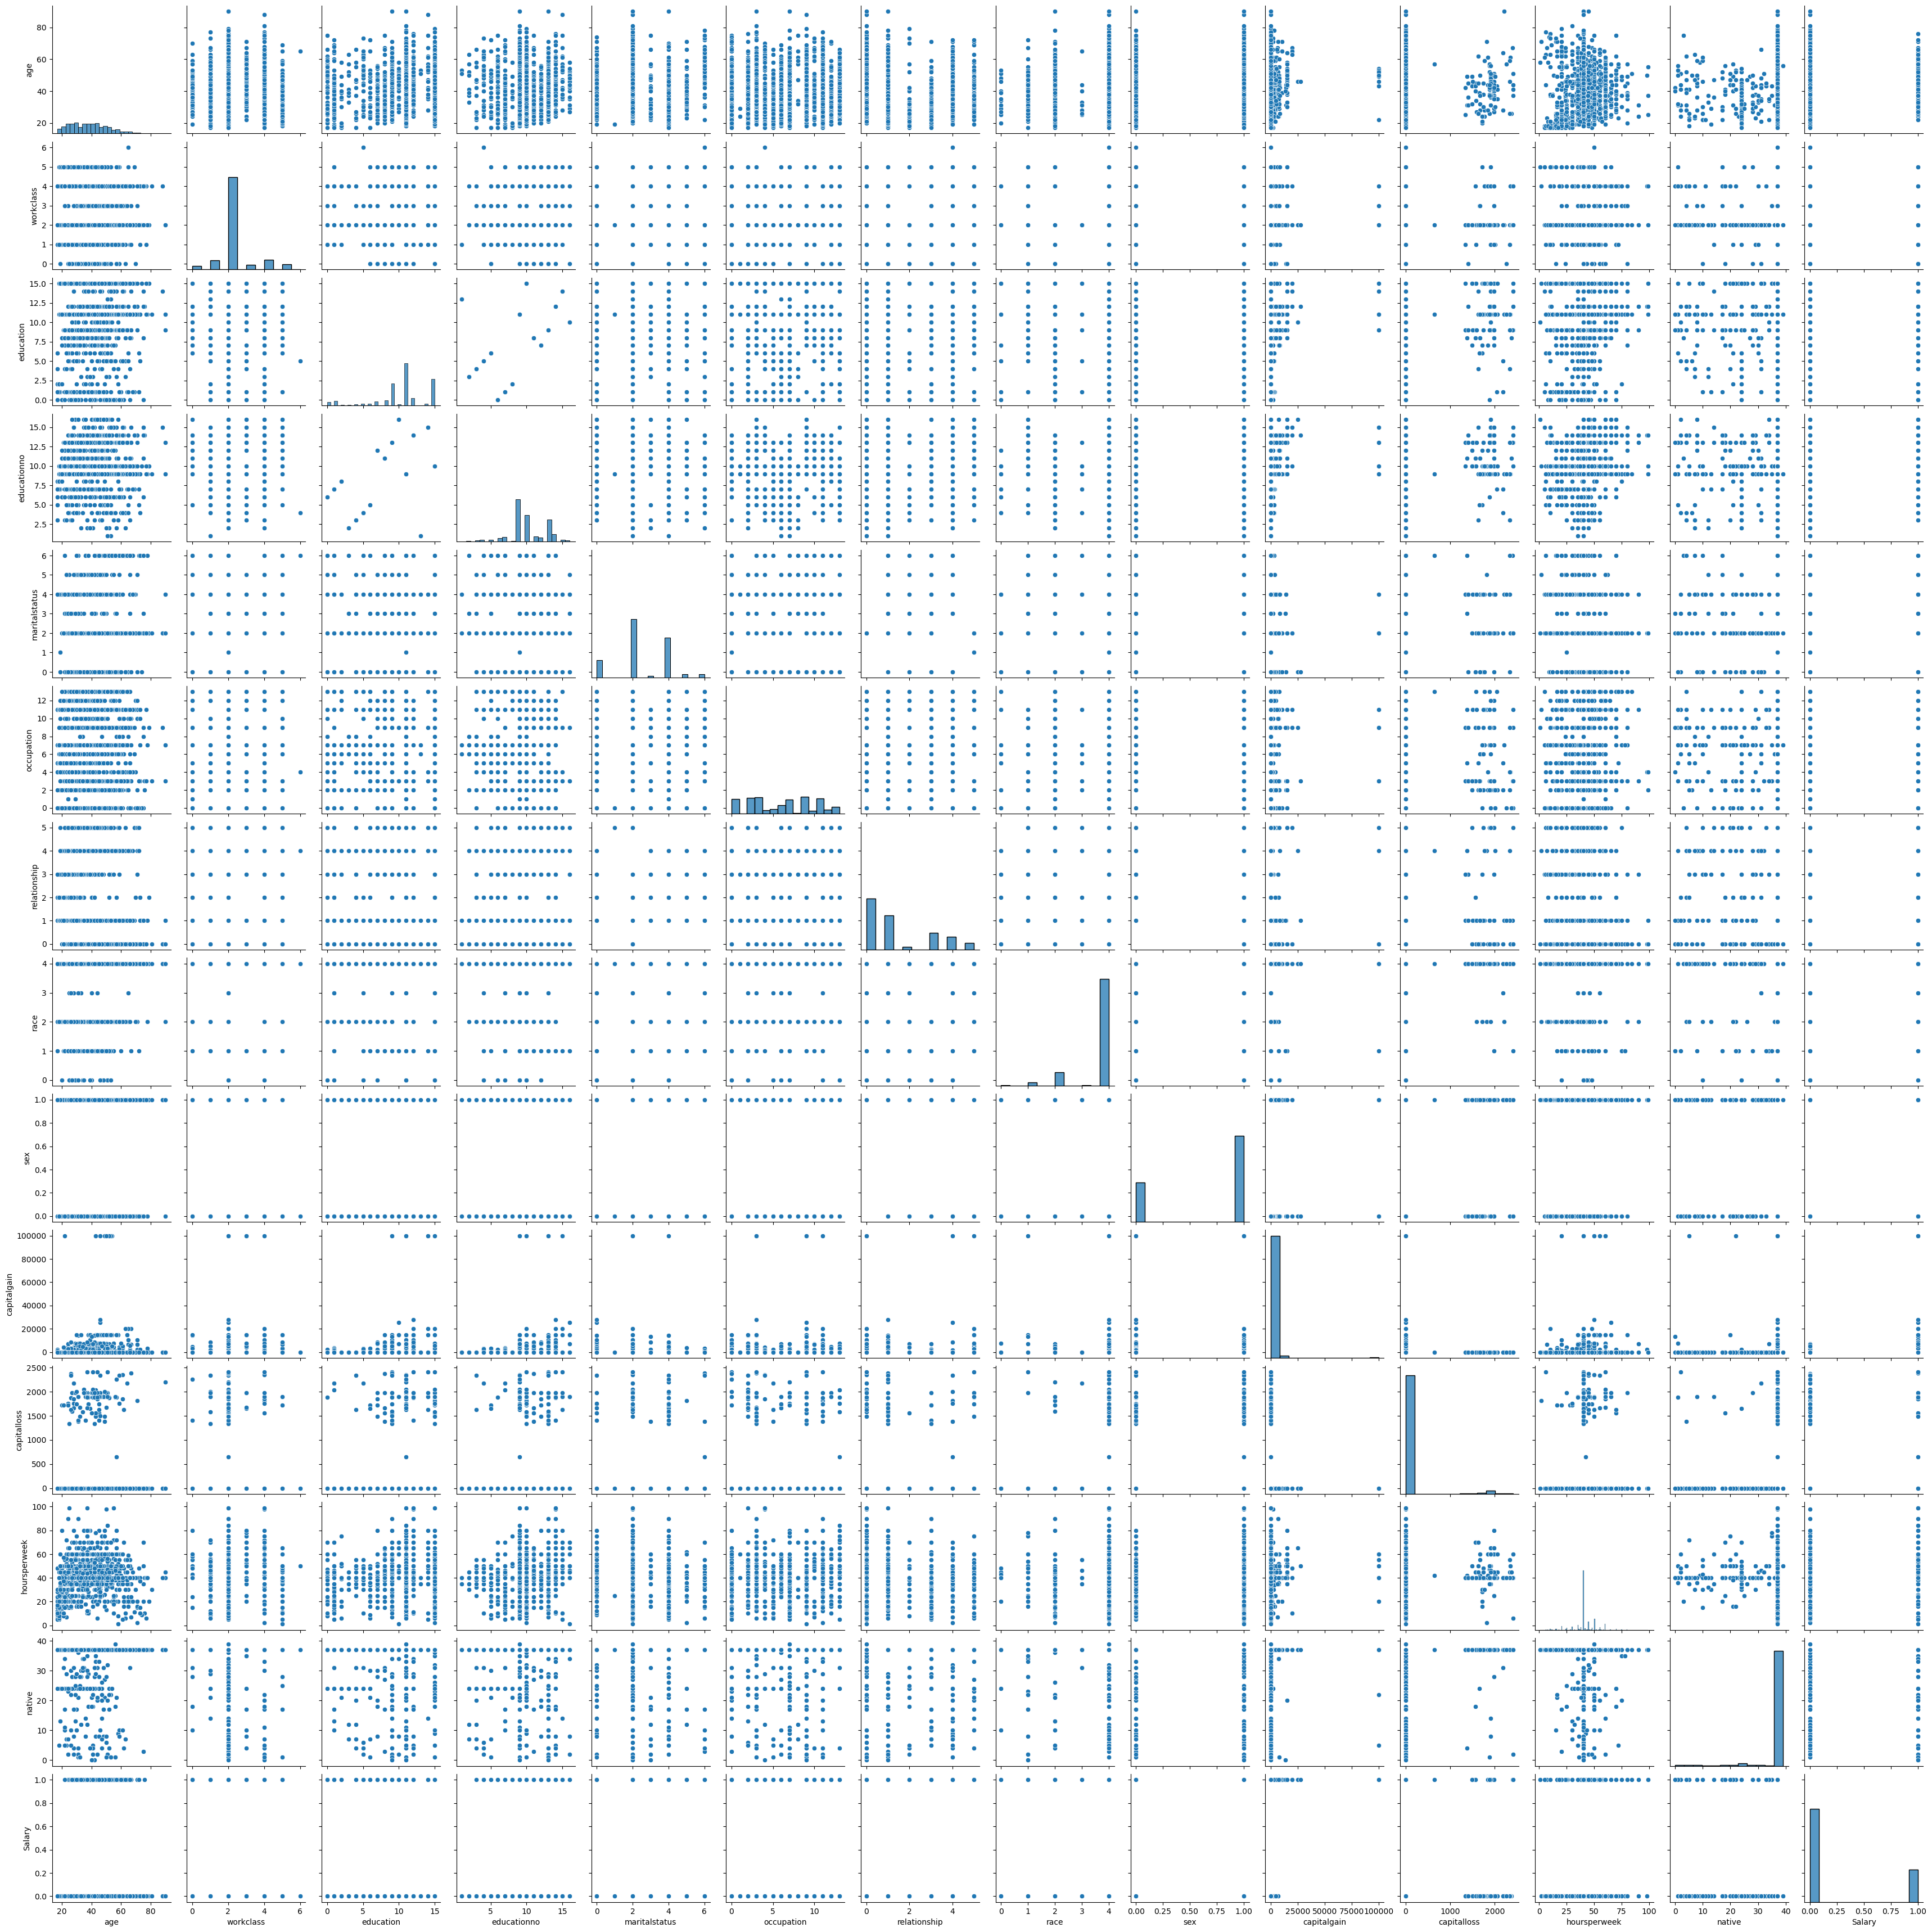

In [35]:
sns.pairplot(train)

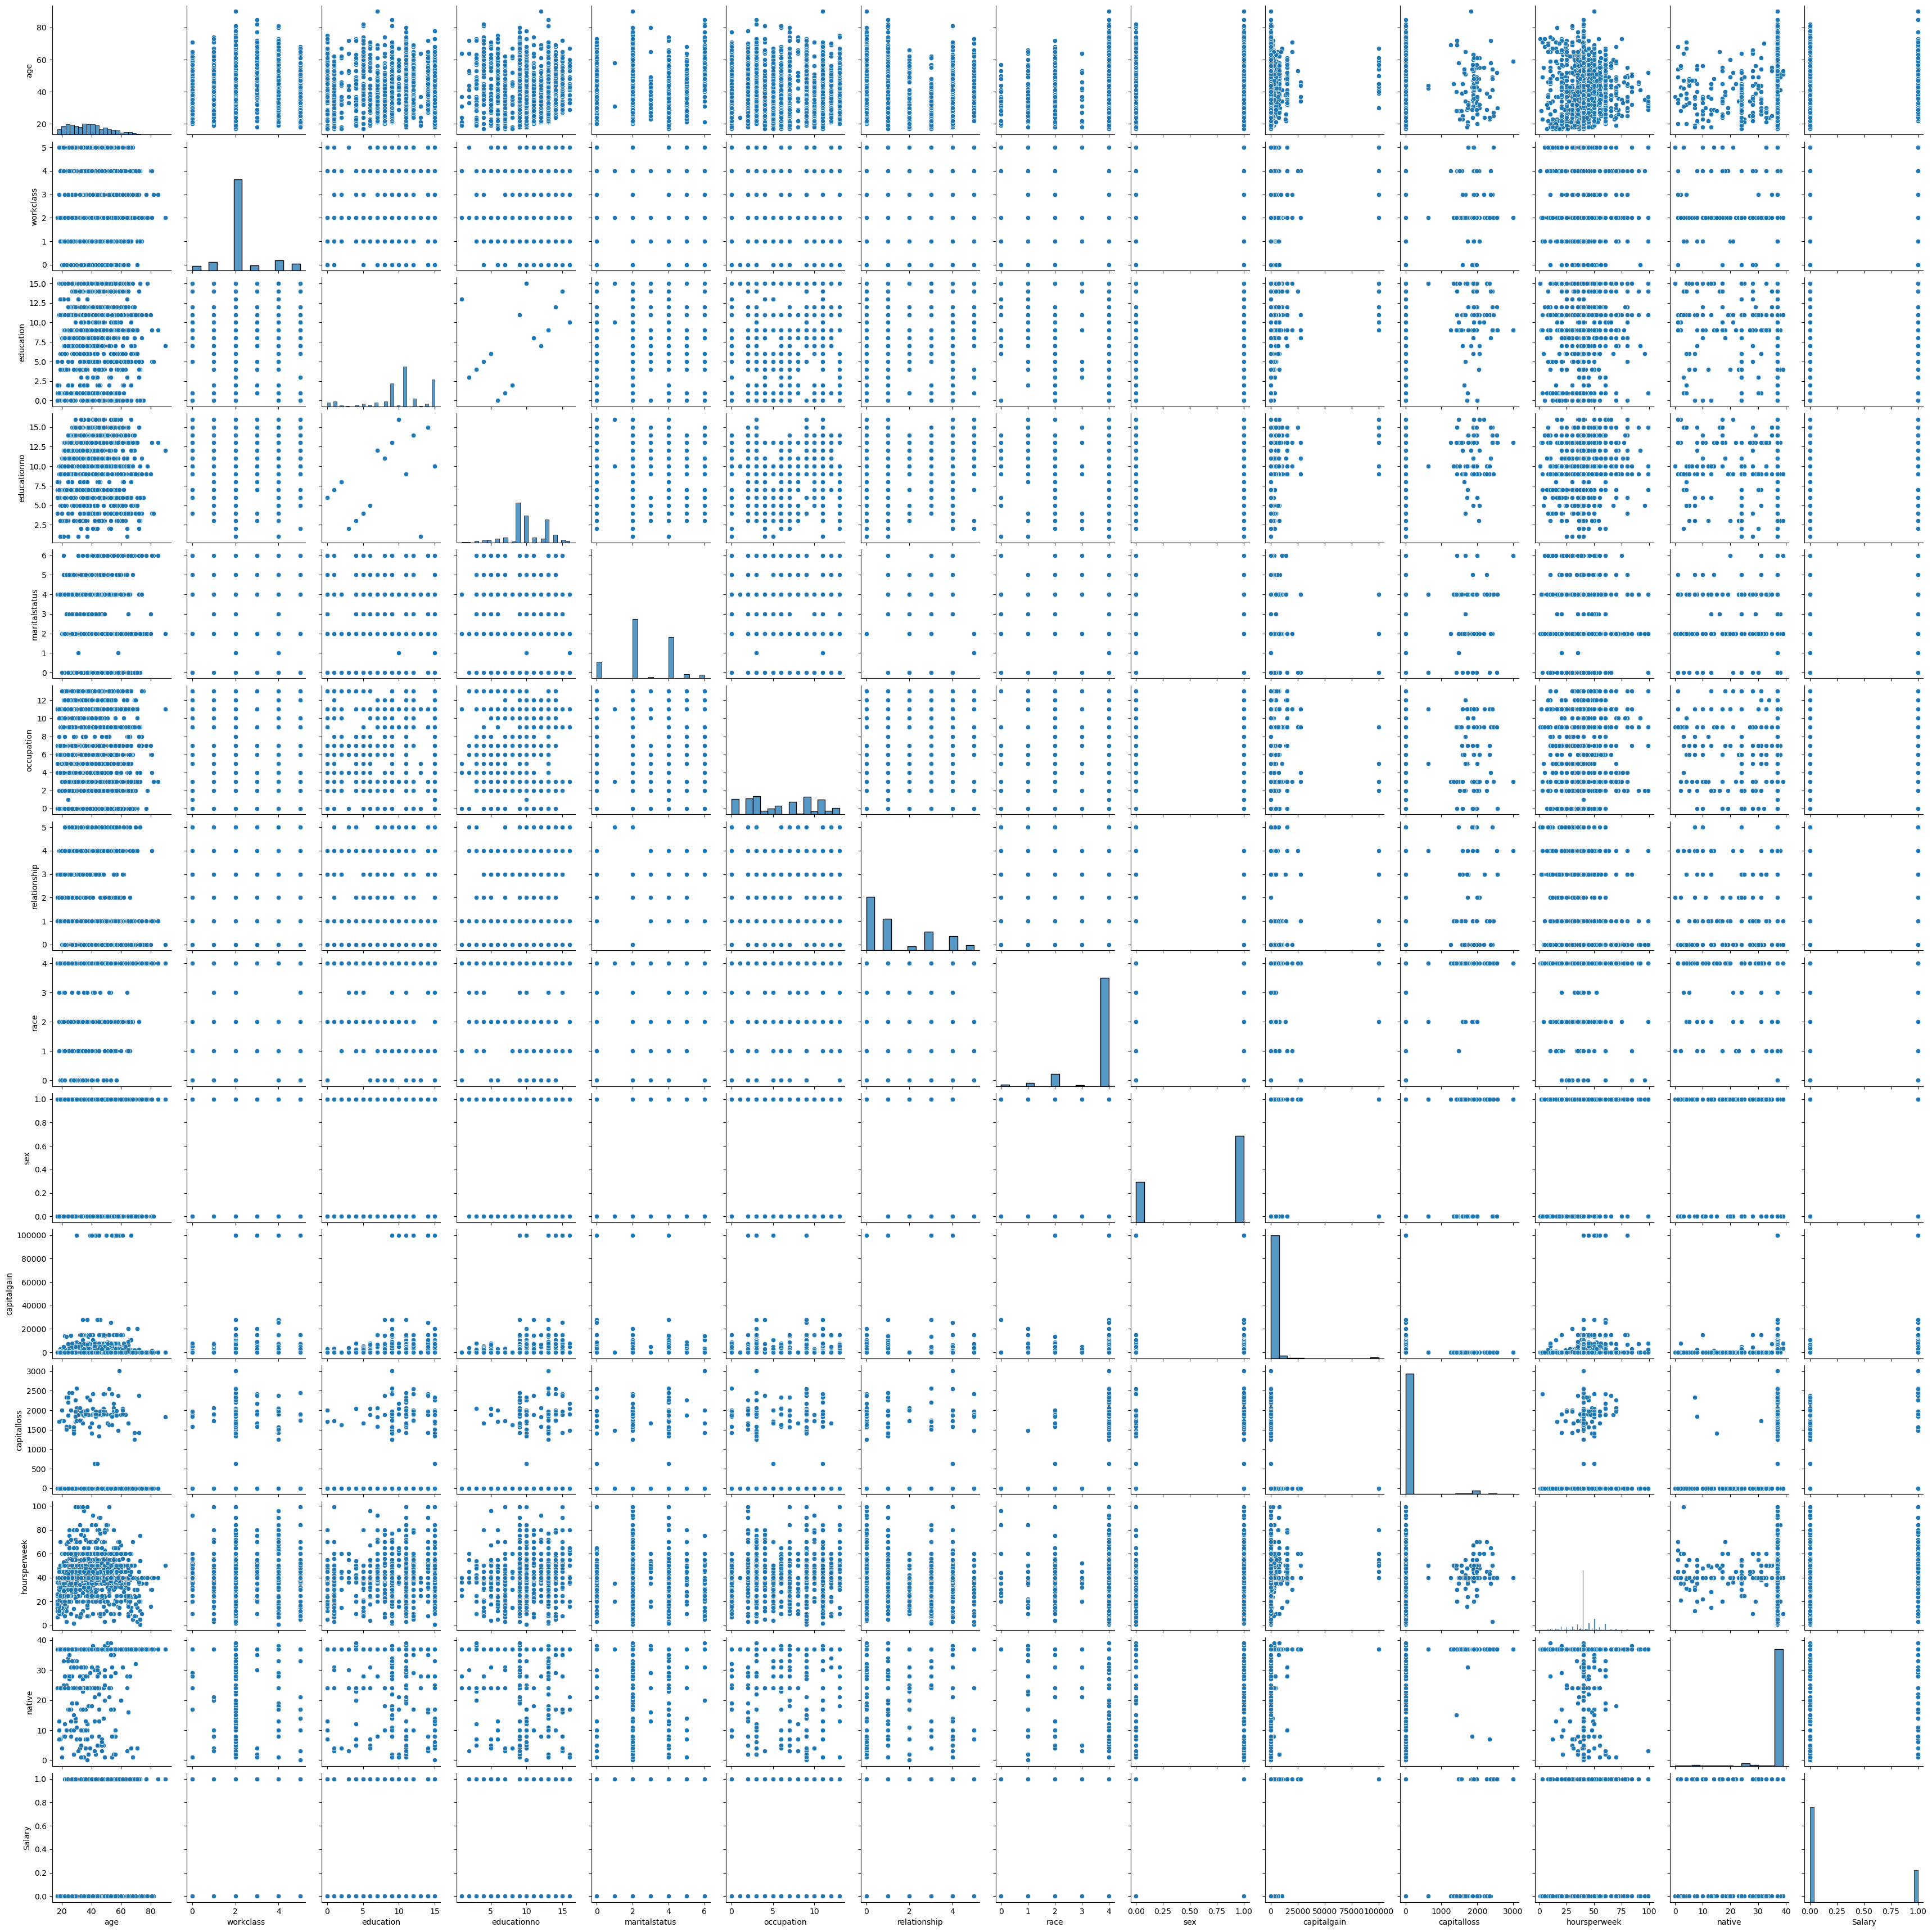

In [36]:
sns.pairplot(test)

# Data Splitting

In [38]:
X_train=train.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,33,2,11,9,5,10,3,4,0,0,0,40,37
1996,41,2,11,9,2,6,0,4,1,0,0,40,37
1997,51,2,6,5,2,13,0,4,1,0,0,40,37
1998,42,2,11,9,2,11,0,4,1,0,0,48,37


In [39]:
y_train=train.iloc[:,-1]
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: Salary, Length: 2000, dtype: int32

In [40]:
X_test=test.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,33,5,15,10,0,9,1,4,0,0,0,40,37
2396,53,4,5,4,2,6,0,4,1,0,0,40,37
2397,43,2,11,9,2,2,0,4,1,0,1902,40,37
2398,44,2,7,12,4,12,1,4,1,0,0,40,37


In [41]:
y_test=test.iloc[:,-1]
y_test

0       0
1       0
2       1
3       1
4       0
       ..
2395    0
2396    0
2397    1
2398    0
2399    0
Name: Salary, Length: 2400, dtype: int32

In [42]:
X_train.shape

(2000, 13)

In [43]:
X_test.shape

(2400, 13)

In [44]:
y_train.shape

(2000,)

In [45]:
y_test.shape

(2400,)

# SVM model

In [49]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

# Predicting model

In [50]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Model Evaluation

In [51]:
print(confusion_matrix(y_test,y_pred))

[[1793    7]
 [ 490  110]]


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1800
           1       0.94      0.18      0.31       600

    accuracy                           0.79      2400
   macro avg       0.86      0.59      0.59      2400
weighted avg       0.82      0.79      0.74      2400



# Model using Grid search CV

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1,5,10,15,20],'gamma':[1,0.1,0.01,0.001,0.0001,0.00001],'kernek':['rbf']}

In [57]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)